# Emissions from Energy use in agriculture


### Project Title: Emissions from Energy Use in Agriculture

This project aims to analyze greenhouse gas emissions resulting from energy use in the agricultural sector. By exploring historical emission values across different regions and time periods, the project will uncover patterns, identify key emission sources, and assess trends.

The analysis will include:
- Identifying the highest emitting countries or regions,
- Tracking emission trends over time,
- Visualizing emission distributions, and
- Detecting anomalies or peak periods.

The project will also build a predictive model to forecast future emission values based on historical data. These insights will support efforts to promote energy efficiency and reduce environmental impacts in agriculture.

In [2]:
!pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Optional
import plotly.express as px
import missingno as msno


In [4]:
df = pd.read_csv("Emission_Agriculture.csv")

In [5]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1990,1990,TJ,115.2,E,Estimated value
1,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1991,1991,TJ,100.8,E,Estimated value
2,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1992,1992,TJ,79.2,E,Estimated value
3,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1993,1993,TJ,75.6,E,Estimated value
4,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1994,1994,TJ,72.0,E,Estimated value


In [7]:
print(df.head())

  Domain Code                                    Domain  Area Code (M49)  \
0          GN  Emissions from Energy use in agriculture                4   
1          GN  Emissions from Energy use in agriculture                4   
2          GN  Emissions from Energy use in agriculture                4   
3          GN  Emissions from Energy use in agriculture                4   
4          GN  Emissions from Energy use in agriculture                4   

          Area  Element Code                    Element  Item Code  \
0  Afghanistan         72184  Energy use in agriculture       6807   
1  Afghanistan         72184  Energy use in agriculture       6807   
2  Afghanistan         72184  Energy use in agriculture       6807   
3  Afghanistan         72184  Energy use in agriculture       6807   
4  Afghanistan         72184  Energy use in agriculture       6807   

          Item  Year Code  Year Unit  Value Flag Flag Description  
0  Electricity       1990  1990   TJ  115.2    E  Esti

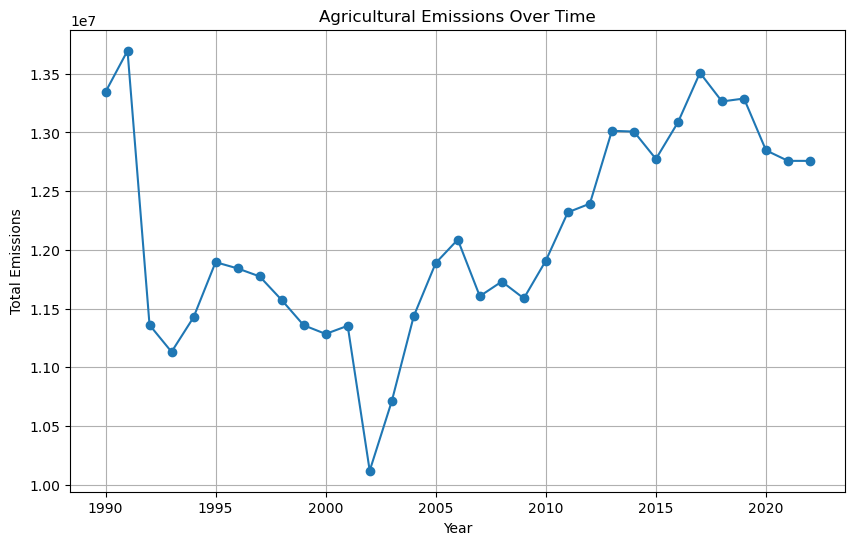

In [10]:
# Group by year
yearly_emissions = df.groupby('Year')['Value'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(yearly_emissions['Year'], yearly_emissions['Value'], marker='o')
plt.title("Agricultural Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.grid(True)
plt.show()

C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_9000\3096312441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emitters.values, y=top_emitters.index, hue=None, palette="viridis", legend=False)


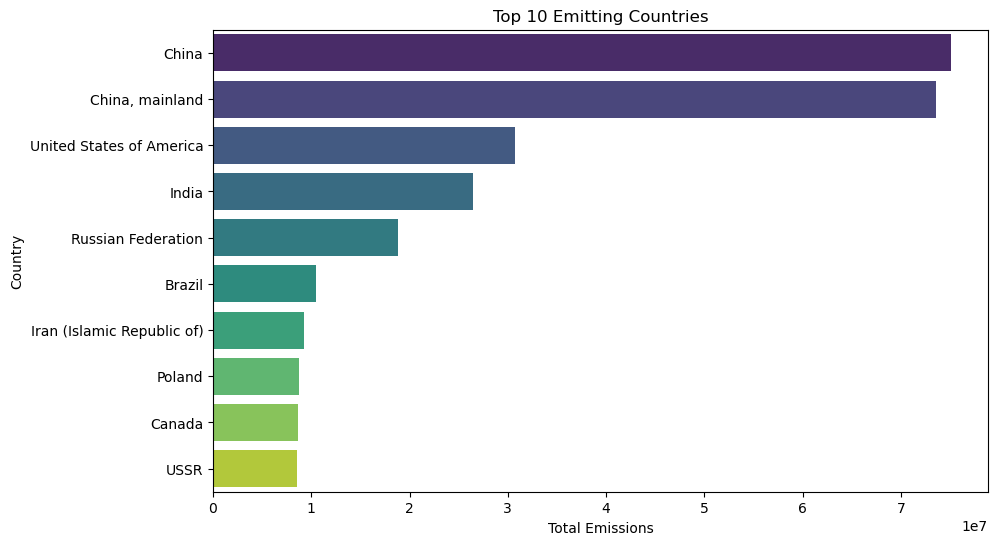

In [14]:
top_emitters = df.groupby('Area')['Value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_emitters.values, y=top_emitters.index, hue=None, palette="viridis", legend=False)
plt.title("Top 10 Emitting Countries")
plt.xlabel("Total Emissions")
plt.ylabel("Country")
plt.show()

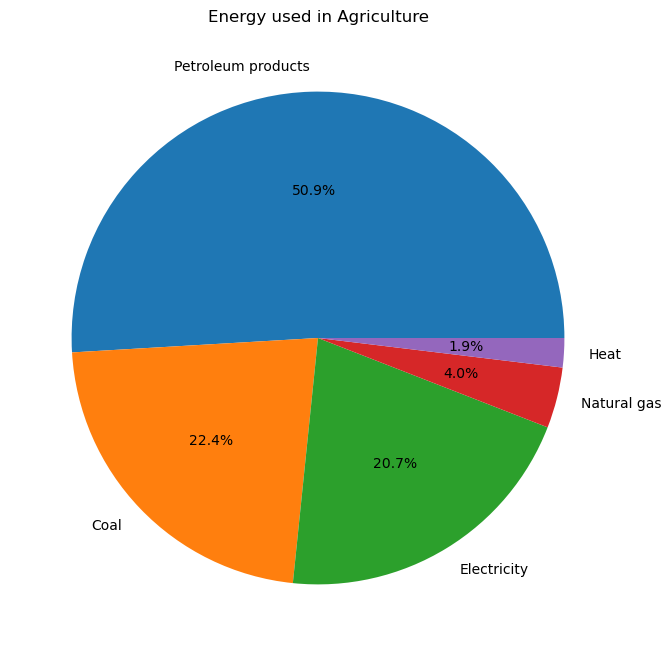

In [25]:
crop_emissions = df.groupby('Item')['Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
crop_emissions.plot(kind='pie', autopct='%1.1f%%')
plt.title("Energy used in Agriculture")
plt.ylabel('')
plt.show()

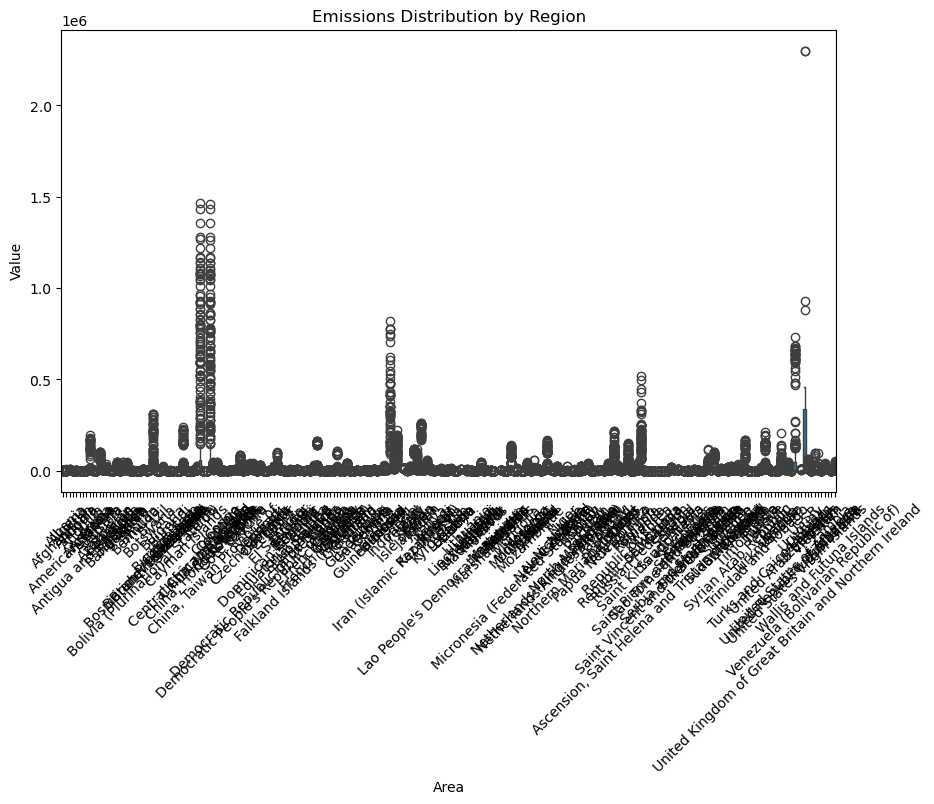

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Area', y='Value')
plt.xticks(rotation=45)
plt.title("Emissions Distribution by Region")
plt.show()

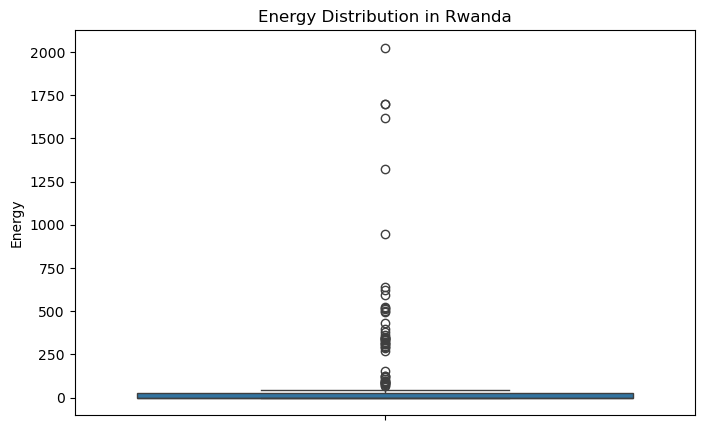

In [26]:
# Filter for Rwanda
rwanda_df = df[df['Area'] == 'Rwanda']

# Plot boxplot for Rwanda (may not show much if only one year/observation)
plt.figure(figsize=(8,5))
sns.boxplot(data=rwanda_df, y='Value')
plt.title("Energy Distribution in Rwanda")
plt.ylabel("Energy")
plt.show()

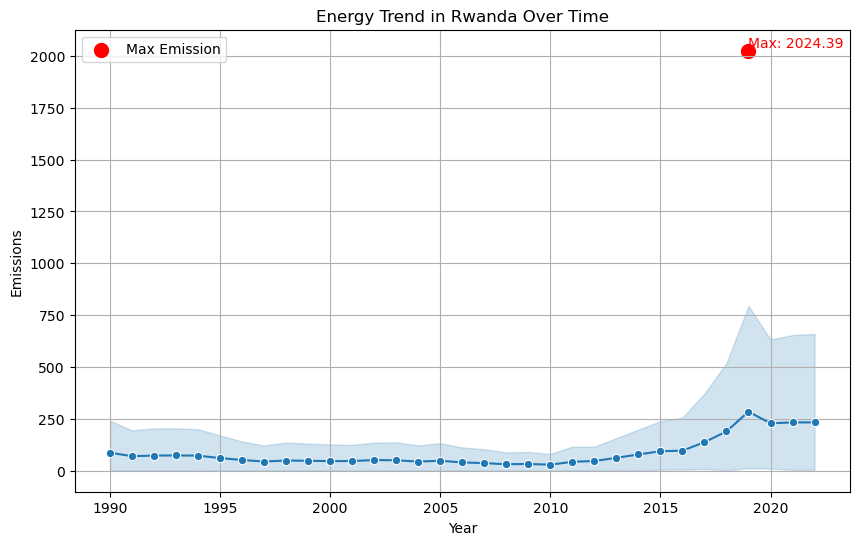

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Rwanda
rwanda_df = df[df['Area'] == 'Rwanda']

# Find the max emission point
max_row = rwanda_df.loc[rwanda_df['Value'].idxmax()]

# Plot line
plt.figure(figsize=(10,6))
sns.lineplot(data=rwanda_df, x='Year', y='Value', marker='o')
plt.title("Energy Trend in Rwanda Over Time")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.grid(True)

# Highlight max point
plt.scatter(max_row['Year'], max_row['Value'], color='red', s=100, label='Max Emission')
plt.text(max_row['Year'], max_row['Value'], 
         f"Max: {max_row['Value']:.2f}", 
         color='red', fontsize=10, ha='left', va='bottom')

plt.legend()
plt.show()


In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df1 = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Compare sizes
print(f"Original size: {df.shape[0]} rows")
print(f"Cleaned size: {df1.shape[0]} rows")


Original size: 65366 rows
Cleaned size: 52615 rows


In [24]:
df1.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1990,1990,TJ,115.2,E,Estimated value
1,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1991,1991,TJ,100.8,E,Estimated value
2,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1992,1992,TJ,79.2,E,Estimated value
3,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1993,1993,TJ,75.6,E,Estimated value
4,GN,Emissions from Energy use in agriculture,4,Afghanistan,72184,Energy use in agriculture,6807,Electricity,1994,1994,TJ,72.0,E,Estimated value
